#### Import Python Library

In [503]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import missingno

import time
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations
from sklearn.decomposition import PCA

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize

import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [506]:
pd.set_option('display.max_columns', 50)  
pd.set_option('display.max_rows', 50)

#### Upload CSV File

In [ ]:
contentfeature = pd.read_csv(r'C:\Users\561807\Documents\AI Research Tool\Data\IC_Design_Features.csv', encoding='utf-8')
contentut = pd.read_csv(r'C:\Users\561807\Documents\AI Research Tool\Data\IC_Content_UT.csv', encoding='utf-8')

#### Replace Null Data into 0

In [ ]:
print(contentut.columns)

Index(['Design', 'PID', 'Gender', 'Age', 'Vehicle', 'standard_left_uda_st_sc',
       'standard_center_uda_st_sc', 'stanrdard_change_view_st_sc',
       'standard_left_uda_dy_eou', 'standard_center_uda_dy_eou',
       'standard_view_dy_eou', 'navigation_view_st_sc',
       'navigation_view_dy_eou', 'assistance_hidden_left_uda_st_sc',
       'assistance_hidden_left_uda_dy_eou', 'assistance_expand_left_uda_st_sc',
       'assistance_expand_left_uda_dy_eou', 'assistance_right_uda_st_sc',
       'assistance_right_uda_dy_eou', 'assistance_left_uda_st_sc',
       'assistance_left_uda_dy_eou', 'assistance_view_st_sc',
       'assistance_view_dy_eou', 'smart_left_expand_st_sc',
       'smart_left_expand_dy_eou', 'overall_preference'],
      dtype='object')


In [ ]:
#insert all features
contentut = contentut.copy()
contentut['standard_center_uda_st_sc'] = contentut['standard_center_uda_st_sc'].fillna(0)
contentut['standard_center_uda_dy_eou'] = contentut['standard_center_uda_dy_eou'].fillna(0)
contentut['stanrdard_change_view_st_sc'] = contentut['stanrdard_change_view_st_sc'].fillna(0)
contentut['standard_left_uda_dy_eou'] = contentut['standard_left_uda_dy_eou'].fillna(0)
contentut['standard_center_uda_dy_eou'] = contentut['standard_center_uda_dy_eou'].fillna(0)
contentut['standard_view_dy_eou'] = contentut['standard_view_dy_eou'].fillna(0)
contentut['navigation_view_st_sc'] = contentut['navigation_view_st_sc'].fillna(0)
contentut['navigation_view_dy_eou'] = contentut['navigation_view_dy_eou'].fillna(0)
contentut['assistance_hidden_left_uda_st_sc'] = contentut['assistance_hidden_left_uda_st_sc'].fillna(0)
contentut['assistance_hidden_left_uda_dy_eou'] = contentut['assistance_hidden_left_uda_dy_eou'].fillna(0)
contentut['assistance_expand_left_uda_st_sc'] = contentut['assistance_expand_left_uda_st_sc'].fillna(0)
contentut['assistance_expand_left_uda_dy_eou'] = contentut['assistance_expand_left_uda_dy_eou'].fillna(0)
contentut['assistance_right_uda_st_sc'] = contentut['assistance_right_uda_st_sc'].fillna(0)
contentut['smart_left_expand_dy_eou'] = contentut['smart_left_expand_dy_eou'].fillna(0)
contentut['assistance_right_uda_dy_eou'] = contentut['assistance_right_uda_dy_eou'].fillna(0)
contentut['assistance_left_uda_dy_eou'] = contentut['assistance_left_uda_dy_eou'].fillna(0)
contentut['assistance_left_uda_st_sc'] = contentut['assistance_left_uda_st_sc'].fillna(0)
contentut['assistance_view_st_sc'] = contentut['assistance_view_st_sc'].fillna(0)
contentut['assistance_view_dy_eou'] = contentut['assistance_view_dy_eou'].fillna(0)
contentut['assistance_view_st_sc'] = contentut['assistance_view_st_sc'].fillna(0)
contentut['assistance_view_dy_eou'] = contentut['assistance_view_dy_eou'].fillna(0)
contentut['smart_left_expand_st_sc'] = contentut['smart_left_expand_st_sc'].fillna(0)
contentut['overall_preference'] = contentut['overall_preference'].fillna(0)

#Check data if all null data are replaced into 0
contentut.head(20)

,Design,PID,Gender,Age,Vehicle,standard_left_uda_st_sc,standard_center_uda_st_sc,stanrdard_change_view_st_sc,standard_left_uda_dy_eou,standard_center_uda_dy_eou,...,assistance_expand_left_uda_dy_eou,assistance_right_uda_st_sc,assistance_right_uda_dy_eou,assistance_left_uda_st_sc,assistance_left_uda_dy_eou,assistance_view_st_sc,assistance_view_dy_eou,smart_left_expand_st_sc,smart_left_expand_dy_eou,overall_preference
0,IC_Content_O,1,Male,50,Ford,1,1.0,1,2,1.0,...,0.0,1.0,2.0,1.0,5.0,0.0,5.0,1.0,5.0,1.0
1,IC_Content_O,2,Male,50,Ford,1,1.0,1,5,2.0,...,0.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0
2,IC_Content_O,3,Female,60,BMW,1,1.0,1,4,4.0,...,0.0,1.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,1.0
3,IC_Content_O,4,Male,50,Lexus,1,1.0,1,5,3.0,...,0.0,1.0,4.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0
4,IC_Content_O,5,Female,20,Ford,1,1.0,1,5,4.0,...,0.0,1.0,3.0,1.0,4.0,1.0,5.0,1.0,5.0,0.0
5,IC_Content_O,6,Male,60,Dodge,1,1.0,1,5,4.0,...,0.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0
6,IC_Content_O,7,Female,40,BMW,1,1.0,1,4,3.0,...,0.0,1.0,5.0,1.0,3.0,1.0,3.0,1.0,5.0,1.0
7,IC_Content_O,8,Male,60,Chevrolet,1,1.0,1,3,4.0,...,0.0,1.0,3.0,0.0,2.0,1.0,4.0,1.0,4.0,0.0
8,IC_Content_O,9,Female,30,Toyota,1,1.0,1,1,2.0,...,0.0,1.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,0.0
9,IC_Content_O,10,Female,60,Toyota,0,1.0,1,2,2.0,...,0.0,0.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0


In [ ]:
#Check any null data. False = no null data
contentut.isnull().any()

Design                               False
PID                                  False
Gender                               False
Age                                  False
Vehicle                              False
standard_left_uda_st_sc              False
standard_center_uda_st_sc            False
stanrdard_change_view_st_sc          False
standard_left_uda_dy_eou             False
standard_center_uda_dy_eou           False
standard_view_dy_eou                 False
navigation_view_st_sc                False
navigation_view_dy_eou               False
assistance_hidden_left_uda_st_sc     False
assistance_hidden_left_uda_dy_eou    False
assistance_expand_left_uda_st_sc     False
assistance_expand_left_uda_dy_eou    False
assistance_right_uda_st_sc           False
assistance_right_uda_dy_eou          False
assistance_left_uda_st_sc            False
assistance_left_uda_dy_eou           False
assistance_view_st_sc                False
assistance_view_dy_eou               False
smart_left_

In [ ]:
print(contentfeature.columns)

Index(['Design', 'bg_color', 'bg_r', 'bg_g', 'bg_b', 'bg_image',
       'bg_image_type', 'mode_number', 'circledesign_color1',
       'circledesign_color2', 'circledesign_color1_r', 'circledesign_color1_g',
       'circledesign_color1_b', 'circledesign_color2_r',
       'circledesign_color2_g', 'circledesign_color2_b',
       'circledesign_gradation', 'speed_info', 'gas_info', 'gas_location_x',
       'gas_location_y', 'gas_size_l', 'gas_size_w', 'range_size_l',
       'range_size_w', 'range_location_x', 'range_location_y', 'range_color',
       'range_r', 'range_g', 'range_b', 'speed_size_l', 'speed_size_w',
       'speed_location_x', 'speed_location_y', 'speed_color', 'speed_r',
       'speed_g', 'speed_b', 'fbar_location1_x', 'fbar_location1_y',
       'fbar_location2_x', 'fbar_location2_y', 'fbar_size_l', 'fbar_size_w',
       'fbar_icon_active_num', 'fbar_icon_default_num', 'fbar_icon_size_l',
       'fbar_icon_size_w', 'left_content_location_x',
       'left_content_location_y', 

In [ ]:
contentfeature = contentfeature.copy()
contentfeature['bg_color'] = contentfeature['bg_color'].fillna(0)
contentfeature['bg_r'] = contentfeature['bg_r'].fillna(0)
contentfeature['bg_g'] = contentfeature['bg_g'].fillna(0)
contentfeature['bg_b'] = contentfeature['bg_b'].fillna(0)
contentfeature['bg_image'] = contentfeature['bg_image'].fillna(0)
contentfeature['bg_image_type'] = contentfeature['bg_image_type'].fillna(0)
contentfeature['mode_number'] = contentfeature['mode_number'].fillna(0)
contentfeature['circledesign_color1'] = contentfeature['circledesign_color1'].fillna(0)
contentfeature['circledesign_color2'] = contentfeature['circledesign_color2'].fillna(0)
contentfeature['circledesign_color1_r'] = contentfeature['circledesign_color1_r'].fillna(0)
contentfeature['circledesign_color1_g'] = contentfeature['circledesign_color1_g'].fillna(0)
contentfeature['circledesign_color1_b'] = contentfeature['circledesign_color1_b'].fillna(0)
contentfeature['circledesign_color2_r'] = contentfeature['circledesign_color2_r'].fillna(0)
contentfeature['circledesign_color2_g'] = contentfeature['circledesign_color2_g'].fillna(0)
contentfeature['circledesign_color2_b'] = contentfeature['circledesign_color2_b'].fillna(0)
contentfeature['circledesign_gradation'] = contentfeature['circledesign_gradation'].fillna(0)
contentfeature['speed_info'] = contentfeature['speed_info'].fillna(0)
contentfeature['gas_info'] = contentfeature['gas_info'].fillna(0)
contentfeature['gas_location_x'] = contentfeature['gas_location_x'].fillna(0)
contentfeature['gas_location_y'] = contentfeature['gas_location_y'].fillna(0)
contentfeature['gas_size_l'] = contentfeature['gas_size_l'].fillna(0)
contentfeature['gas_size_w'] = contentfeature['gas_size_w'].fillna(0)
contentfeature['range_size_l'] = contentfeature['range_size_l'].fillna(0)
contentfeature['range_size_w'] = contentfeature['range_size_w'].fillna(0)
contentfeature['range_location_x'] = contentfeature['range_location_x'].fillna(0)
contentfeature['range_location_y'] = contentfeature['range_location_y'].fillna(0)
contentfeature['range_color'] = contentfeature['range_color'].fillna(0)
contentfeature['range_r'] = contentfeature['range_r'].fillna(0)
contentfeature['range_g'] = contentfeature['range_g'].fillna(0)
contentfeature['range_b'] = contentfeature['range_b'].fillna(0)
contentfeature['speed_size_l'] = contentfeature['speed_size_l'].fillna(0)
contentfeature['speed_size_w'] = contentfeature['speed_size_w'].fillna(0)
contentfeature['speed_location_x'] = contentfeature['speed_location_x'].fillna(0)
contentfeature['speed_location_y'] = contentfeature['speed_location_y'].fillna(0)
contentfeature['speed_color'] = contentfeature['speed_color'].fillna(0)
contentfeature['speed_r'] = contentfeature['speed_r'].fillna(0)
contentfeature['speed_g'] = contentfeature['speed_g'].fillna(0)
contentfeature['speed_b'] = contentfeature['speed_b'].fillna(0)
contentfeature['fbar_location1_x'] = contentfeature['fbar_location1_x'].fillna(0)
contentfeature['fbar_location1_y'] = contentfeature['fbar_location1_y'].fillna(0)
contentfeature['fbar_location2_x'] = contentfeature['fbar_location2_x'].fillna(0)
contentfeature['fbar_location2_y'] = contentfeature['fbar_location2_y'].fillna(0)
contentfeature['fbar_size_l'] = contentfeature['fbar_size_l'].fillna(0)
contentfeature['fbar_size_w'] = contentfeature['fbar_size_w'].fillna(0)
contentfeature['fbar_icon_active_num'] = contentfeature['fbar_icon_active_num'].fillna(0)
contentfeature['fbar_icon_default_num'] = contentfeature['fbar_icon_default_num'].fillna(0)
contentfeature['fbar_icon_size_l'] = contentfeature['fbar_icon_size_l'].fillna(0)
contentfeature['left_content_location_x'] = contentfeature['left_content_location_x'].fillna(0)
contentfeature['left_content_location_y'] = contentfeature['left_content_location_y'].fillna(0)
contentfeature['left_content_size_l'] = contentfeature['left_content_size_l'].fillna(0)
contentfeature['left_content_size_w'] = contentfeature['left_content_size_w'].fillna(0)
contentfeature['center_content_location_x'] = contentfeature['center_content_location_x'].fillna(0)
contentfeature['center_content_location_y'] = contentfeature['center_content_location_y'].fillna(0)
contentfeature['center_content_size_l'] = contentfeature['center_content_size_l'].fillna(0)
contentfeature['center_content_size_w'] = contentfeature['center_content_size_w'].fillna(0)
contentfeature['right_content_size_l'] = contentfeature['right_content_size_l'].fillna(0)
contentfeature['right_content_size_w'] = contentfeature['right_content_size_w'].fillna(0)
contentfeature['right_content_location_x'] = contentfeature['right_content_location_x'].fillna(0)
contentfeature['right_content_location_y'] = contentfeature['right_content_location_y'].fillna(0)
contentfeature['arrow'] = contentfeature['arrow'].fillna(0)
contentfeature['arrow_size_l'] = contentfeature['arrow_size_l'].fillna(0)
contentfeature['arrow_size_w'] = contentfeature['arrow_size_w'].fillna(0)
contentfeature['dot'] = contentfeature['dot'].fillna(0)
contentfeature['dot_size_l'] = contentfeature['dot_size_l'].fillna(0)
contentfeature['dot_size_w'] = contentfeature['dot_size_w'].fillna(0)
contentfeature['left_uda_menu_depth'] = contentfeature['left_uda_menu_depth'].fillna(0)
contentfeature['center_uda_menu_depth'] = contentfeature['center_uda_menu_depth'].fillna(0)
contentfeature['right_uda_menu_depth'] = contentfeature['right_uda_menu_depth'].fillna(0)
contentfeature['extended_uda_l'] = contentfeature['extended_uda_l'].fillna(0)
contentfeature['extended_uda_w'] = contentfeature['extended_uda_w'].fillna(0)
contentfeature['set_speed_location_x'] = contentfeature['set_speed_location_x'].fillna(0)
contentfeature['set_speed_location_y'] = contentfeature['set_speed_location_y'].fillna(0)
contentfeature['set_speed_size_l'] = contentfeature['set_speed_size_l'].fillna(0)
contentfeature['set_speed_size_w'] = contentfeature['set_speed_size_w'].fillna(0)
contentfeature['sa_acc_on_color'] = contentfeature['sa_acc_on_color'].fillna(0)
contentfeature['sa_acc_on_r'] = contentfeature['sa_acc_on_r'].fillna(0)
contentfeature['sa_acc_on_g'] = contentfeature['sa_acc_on_g'].fillna(0)
contentfeature['sa_acc_on_b'] = contentfeature['sa_acc_on_b'].fillna(0)
contentfeature['sa_vehicle_size_l'] = contentfeature['sa_vehicle_size_l'].fillna(0)
contentfeature['sa_vehicle_size_w'] = contentfeature['sa_vehicle_size_w'].fillna(0)
contentfeature['sa_size_l'] = contentfeature['sa_size_l'].fillna(0)
contentfeature['sa_size_w'] = contentfeature['sa_size_w'].fillna(0)
contentfeature['sa_location_x'] = contentfeature['sa_location_x'].fillna(0)
contentfeature['IC_size_w'] = contentfeature['IC_size_w'].fillna(0)
contentfeature['HON_color'] = contentfeature['HON_color'].fillna(0)
contentfeature['HON_r'] = contentfeature['HON_r'].fillna(0)
contentfeature['HON_g'] = contentfeature['HON_g'].fillna(0)
contentfeature['HON_b'] = contentfeature['HON_b'].fillna(0)
contentfeature['IC_size_l'] = contentfeature['IC_size_l'].fillna(0)
contentfeature['IC_size_w'] = contentfeature['IC_size_w'].fillna(0)

contentfeature.head(10)

,Design,bg_color,bg_r,bg_g,bg_b,bg_image,bg_image_type,mode_number,circledesign_color1,circledesign_color2,...,sa_size_l,sa_size_w,sa_location_x,sa_location_y,HON_color,HON_r,HON_g,HON_b,IC_size_l,IC_size_w
0,TSS4_1_SA,black,0,0,0,0,0,3,0,0,...,550,725,798,453,0,0.0,0.0,0.0,1921,727
1,TSS4_2_standard,black,0,0,0,0,0,3,blue,purple,...,270,177,1084,260,blue,7.0,131.0,229.0,1921,727
2,IC_Content_O_Standard,bluegray,29,30,37,1,nature,6,darkteal,teal,...,288,130,1057,415,0,0.0,0.0,0.0,1921,727
3,IC_Content_O_SmartLayout,bluegray,29,30,37,1,nature,6,0,0,...,288,130,1057,415,0,0.0,0.0,0.0,1921,727
4,IC_Content_O_Navigation,lightgray,81,84,87,1,map,6,0,0,...,288,130,1057,415,0,0.0,0.0,0.0,1921,727
5,IC_Content_O_Assistant,bluegray,29,30,37,1,nature,6,0,0,...,675,353,470,555,0,0.0,0.0,0.0,1921,727
6,IC_Content_O_Minimal,bluegray,29,30,37,1,nature,6,0,0,...,288,130,1057,415,0,0.0,0.0,0.0,1921,727
7,IC_Content_O_Sport,black,0,0,0,0,0,6,darkorange,orange,...,288,130,1057,415,0,0.0,0.0,0.0,1921,727
8,IC_Content_E_Standard,bluegray,29,30,37,1,nature,6,darkteal,teal,...,288,130,1057,415,0,0.0,0.0,0.0,1921,727
9,IC_Content_E_Sport,black,0,0,0,0,0,6,darkred,red,...,288,130,1057,415,0,0.0,0.0,0.0,1921,727


In [ ]:
contentfeature.isnull().any()

Design       False
bg_color     False
bg_r         False
bg_g         False
bg_b         False
             ...  
HON_r        False
HON_g        False
HON_b        False
IC_size_l    False
IC_size_w    False
Length: 92, dtype: bool

#### Check Data Duplicaption

In [ ]:
#Check duplicated data
print("duplicated data :", len(contentut[contentut.duplicated()])) 

duplicated data : 0


In [ ]:
print("duplicated data :", len(contentfeature[contentfeature.duplicated()])) 

duplicated data : 0


#### Data Visualization - Object

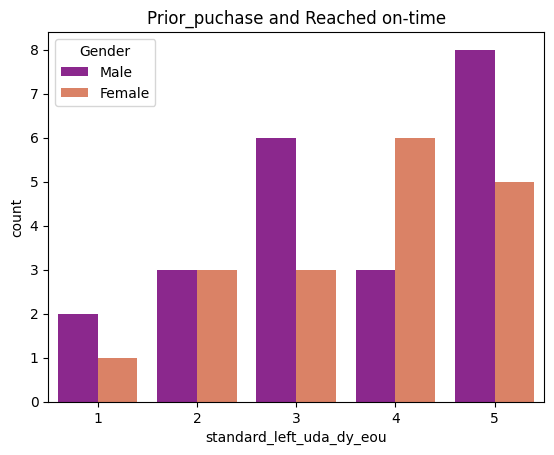

In [ ]:
#Count Plot
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "standard_left_uda_dy_eou", data = contentut, palette = "plasma",hue="Gender");
plt.title('Prior_puchase and Reached on-time')
plt.show()

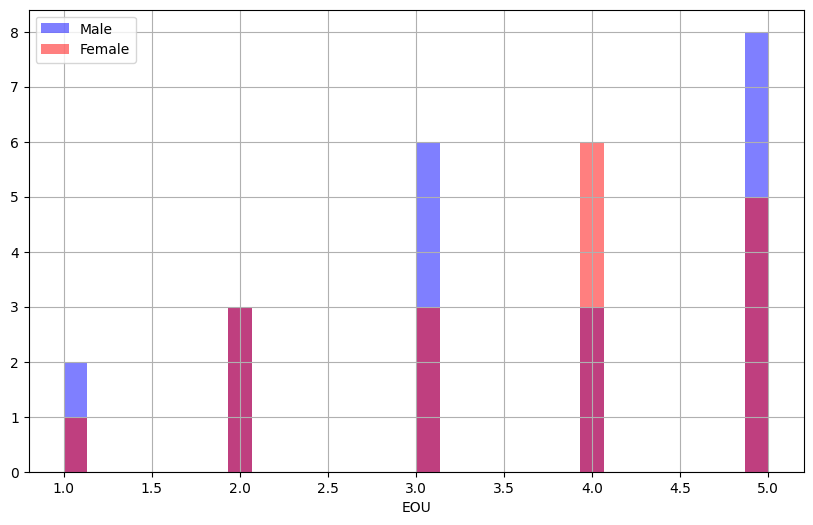

In [ ]:
plt.figure(figsize=(10,6))
contentut[contentut['Gender']=='Male']['standard_left_uda_dy_eou'].hist(alpha=0.5,color='blue',bins=30,label='Male')
contentut[contentut['Gender']=='Female']['standard_left_uda_dy_eou'].hist(alpha=0.5,color='red',bins=30,label='Female')
plt.xlabel('EOU')
plt.legend()

In [ ]:
#Check objects 
contentut.select_dtypes(include=['object','category']).head(23)

,Design,Gender,Vehicle
0,IC_Content_O,Male,Ford
1,IC_Content_O,Male,Ford
2,IC_Content_O,Female,BMW
3,IC_Content_O,Male,Lexus
4,IC_Content_O,Female,Ford
5,IC_Content_O,Male,Dodge
6,IC_Content_O,Female,BMW
7,IC_Content_O,Male,Chevrolet
8,IC_Content_O,Female,Toyota
9,IC_Content_O,Female,Toyota


In [ ]:
#Check number within each object features
cat_feat = contentut.select_dtypes('object','category').columns.values
train_cat = contentut[cat_feat].copy()
print(train_cat.nunique().sort_values())

Design     2
Gender     2
Vehicle    8
dtype: int64


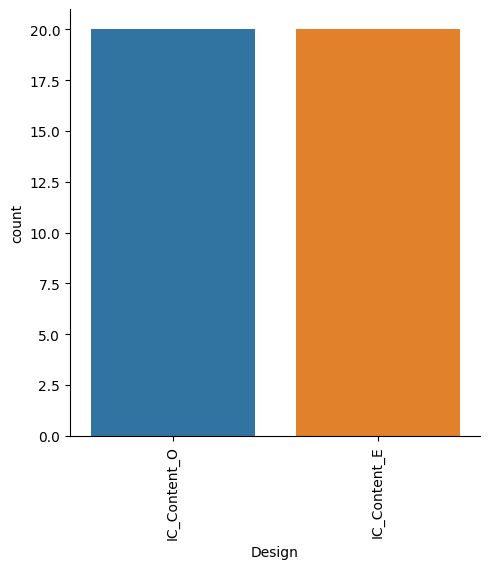

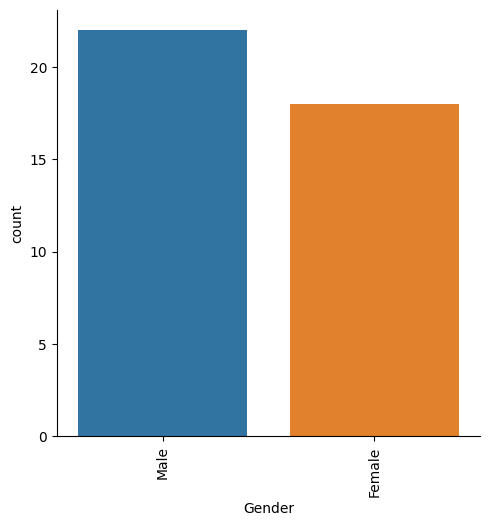

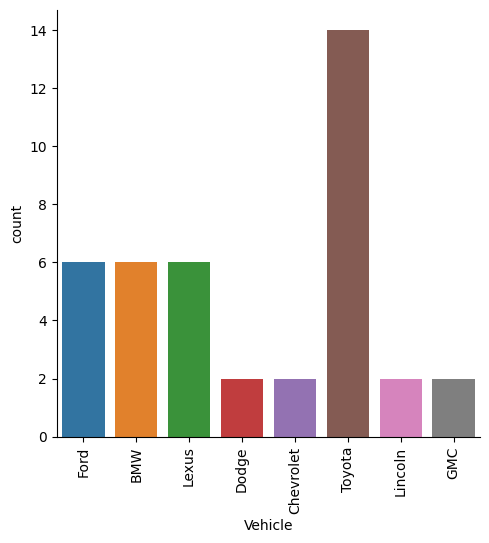

In [ ]:
for col in train_cat.columns:
  fig = sns.catplot(x=col, kind="count", data=train_cat, hue=None)
  fig.set_xticklabels(rotation=90)
  plt.show()

#### Statistical Analsis

##### Mean and Standard Deviation

In [510]:
contentut.groupby('Design').agg(['mean','std'])

PID          Gender             Age            Vehicle             
        mean      std   mean       std  mean        std    mean       std   
Design                                                                      
0       10.5  5.91608   0.55  0.510418  47.0  14.545754     4.3  2.637782  \
1       10.5  5.91608   0.55  0.510418  47.0  14.545754     4.3  2.637782   

       standard_left_uda_st_sc           standard_center_uda_st_sc             
                          mean       std                      mean       std   
Design                                                                         
0                          1.0  0.000000                      0.00  0.000000  \
1                          0.9  0.307794                      0.95  0.223607   

       stanrdard_change_view_st_sc           standard_left_uda_dy_eou   
                              mean       std                     mean   
Design                                                                  
0                             0.95  0.223607                     3.65  \
1                             1.00  0.000000                     3.50   

                 standard_center_uda_dy_eou           standard_view_dy_eou   
             std                       mean       std                 mean   
Design                                                                       
0       1.182103                       0.00  0.000000                 3.95  \
1       1.432701                       2.45  1.276302                 4.05   

                 navigation_view_st_sc      navigation_view_dy_eou             
             std                  mean  std                   mean       std   
Design                                                                         
0       1.099043                   1.0  0.0                   3.95  0.887041  \
1       1.145931                   1.0  0.0                   4.35  1.136708   

       assistance_hidden_left_uda_st_sc             
                                   mean       std   
Design                                              
0                                  0.95  0.223607  \
1                                  0.00  0.000000   

       assistance_hidden_left_uda_dy_eou             
                                    mean       std   
Design                                               
0                                    4.7  0.732695  \
1                                    0.0  0.000000   

       assistance_expand_left_uda_st_sc             
                                   mean       std   
Design                                              
0                                  0.85  0.366348  \
1                                  0.00  0.000000   

       assistance_expand_left_uda_dy_eou           assistance_right_uda_st_sc   
                                    mean       std                       mean   
Design                                                                          
0                                   4.25  1.164158                       0.00  \
1                                   0.00  0.000000                       0.85   

                 assistance_right_uda_dy_eou             
             std                        mean       std   
Design                                                   
0       0.000000                         0.0  0.000000  \
1       0.366348                         3.5  1.538968   

       assistance_left_uda_st_sc           assistance_left_uda_dy_eou   
                            mean       std                       mean   
Design                                                                  
0                           0.00  0.000000                        0.0  \
1                           0.95  0.223607                        4.1   

                 assistance_view_st_sc           assistance_view_dy_eou   
             std                  mean       std                   mean   
Design                                          

In [509]:
contentut.describe()

,Design,PID,Gender,Age,Vehicle,standard_left_uda_st_sc,standard_center_uda_st_sc,stanrdard_change_view_st_sc,standard_left_uda_dy_eou,standard_center_uda_dy_eou,standard_view_dy_eou,navigation_view_st_sc,navigation_view_dy_eou,assistance_hidden_left_uda_st_sc,assistance_hidden_left_uda_dy_eou,assistance_expand_left_uda_st_sc,assistance_expand_left_uda_dy_eou,assistance_right_uda_st_sc,assistance_right_uda_dy_eou,assistance_left_uda_st_sc,assistance_left_uda_dy_eou,assistance_view_st_sc,assistance_view_dy_eou,smart_left_expand_st_sc,smart_left_expand_dy_eou,overall_preference
count,40.00000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0000,40.0,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000
mean,0.50000,10.50000,0.550000,47.000000,4.300000,0.950000,0.475000,0.975000,3.575000,1.225000,4.0000,1.0,4.15000,0.475000,2.350000,0.425000,2.125000,0.425000,1.750000,0.475000,2.050000,0.475000,2.150000,0.475000,2.225000,0.50000
std,0.50637,5.83974,0.503831,14.358059,2.603745,0.220721,0.505736,0.158114,1.298668,1.527315,1.1094,0.0,1.02657,0.505736,2.434264,0.500641,2.300362,0.500641,2.072407,0.505736,2.297713,0.505736,2.259453,0.505736,2.314807,0.50637
min,0.00000,1.00000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.0000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.00000,5.75000,0.000000,37.500000,2.750000,1.000000,0.000000,1.000000,3.000000,0.000000,3.0000,1.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.50000,10.50000,1.000000,50.000000,5.000000,1.000000,0.000000,1.000000,4.000000,0.000000,4.0000,1.0,4.00000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,1.500000,0.50000
75%,1.00000,15.25000,1.000000,60.000000,7.000000,1.000000,1.000000,1.000000,5.000000,2.250000,5.0000,1.0,5.00000,1.000000,5.000000,1.000000,5.000000,1.000000,3.250000,1.000000,5.000000,1.000000,5.000000,1.000000,5.000000,1.00000
max,1.00000,20.00000,1.000000,60.000000,7.000000,1.000000,1.000000,1.000000,5.000000,4.000000,5.0000,1.0,5.00000,1.000000,5.000000,1.000000,5.000000,1.000000,5.000000,1.000000,5.000000,1.000000,5.000000,1.000000,5.000000,1.00000


##### T-Test

In [ ]:
#Independent Two Sample T-Test

from scipy.stats import ttest_ind

group1 = contentut[contentut['Gender']=='Male']
group2 = contentut[contentut['Gender']=='Female']

ttest_ind(group1['standard_left_uda_dy_eou'], group2['standard_left_uda_dy_eou'])

#Result: since the p-value is more than 0.05, we accept the null hypothesis. Therefore, we do not have sufficient evidence to say that there is a difference in ease of use of stardard left UDA among gender.


Ttest_indResult(statistic=-0.15707174426584622, pvalue=0.8760199166286217)

In [ ]:
#Independent Two Sample T-Test

from scipy.stats import ttest_ind

group1 = contentut[contentut['Gender']=='Male']
group2 = contentut[contentut['Gender']=='Female']

ttest_ind(group1['standard_center_uda_dy_eou'], group2['standard_center_uda_dy_eou'])

#Result: since the p-value is more than 0.05, we accept the null hypothesis. Therefore, we do not have sufficient evidence to say that there is a difference in ease of use of stardard left UDA among gender.

Ttest_indResult(statistic=-0.818474193636793, pvalue=0.4181897119999226)

##### Chi-Square

In [ ]:
contigency= pd.crosstab(contentut['Gender'], contentut['assistance_view_dy_eou'])
contigency

assistance_view_dy_eou,0.0,3.0,4.0,5.0
Gender,,,,
Female,9,5,1,3
Male,11,0,3,8


In [ ]:
contigency_pct = pd.crosstab(contentut['Gender'], contentut['assistance_view_dy_eou'], normalize='index')
contigency_pct

assistance_view_dy_eou,0.0,3.0,4.0,5.0
Gender,,,,
Female,0.5,0.277778,0.055556,0.166667
Male,0.5,0.000000,0.136364,0.363636


In [ ]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
p

#Result: Since p-value is less than 0.05, we reject the null hypothesis. Therefore, we can conclude that there is sufficient evidence to say that the gender lead to different ease of use score for assistance view.

0.04292871713206347

##### ANOVA

In [ ]:
#One-way ANOVA
import scipy.stats

x1 = [41, 12, 43, 54, 45]
x2 = [26, 47, 18, 79, 10]
x3 = [15, 22, 43, 54, 25]
f_statistic, p_value = scipy.stats.f_oneway(x1, x2, x3)
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

F-statistic: 0.15319747013352078
p-value: 0.8596118335625917


In [ ]:
# Recoding value from numeric to string
# contentut['Gender'].replace({1: 'Male', 2: 'low', 3: 'high'}, inplace= True)

In [ ]:
import scipy.stats as stats

stats.f_oneway(contentut['standard_left_uda_dy_eou'][contentut['stanrdard_change_view_st_sc']],
               contentut['standard_left_uda_dy_eou'][contentut['standard_center_uda_st_sc']],
               contentut['standard_left_uda_dy_eou'][contentut['standard_left_uda_st_sc']])

F_onewayResult(statistic=28.908560311284052, pvalue=6.276406874042994e-11)

#### Check Data Type

In [ ]:
#Check unique values for each column
contentut.nunique().sort_values()

navigation_view_st_sc                 1
Design                                2
smart_left_expand_st_sc               2
assistance_view_st_sc                 2
assistance_left_uda_st_sc             2
assistance_right_uda_st_sc            2
assistance_expand_left_uda_st_sc      2
assistance_hidden_left_uda_st_sc      2
overall_preference                    2
stanrdard_change_view_st_sc           2
standard_center_uda_st_sc             2
standard_left_uda_st_sc               2
Gender                                2
standard_view_dy_eou                  4
smart_left_expand_dy_eou              4
assistance_hidden_left_uda_dy_eou     4
assistance_view_dy_eou                4
standard_center_uda_dy_eou            5
assistance_left_uda_dy_eou            5
navigation_view_dy_eou                5
standard_left_uda_dy_eou              5
Age                                   5
assistance_right_uda_dy_eou           6
assistance_expand_left_uda_dy_eou     6
Vehicle                               8


In [ ]:
#Check data type (Object data needs to be converted)
print(contentut.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Design                             40 non-null     object 
 1   PID                                40 non-null     int64  
 2   Gender                             40 non-null     object 
 3   Age                                40 non-null     int64  
 4   Vehicle                            40 non-null     object 
 5   standard_left_uda_st_sc            40 non-null     int64  
 6   standard_center_uda_st_sc          40 non-null     float64
 7   stanrdard_change_view_st_sc        40 non-null     int64  
 8   standard_left_uda_dy_eou           40 non-null     int64  
 9   standard_center_uda_dy_eou         40 non-null     float64
 10  standard_view_dy_eou               40 non-null     int64  
 11  navigation_view_st_sc              40 non-null     int64  
 

In [ ]:
#check data type per column
dtype_data = contentut.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data = dtype_data.groupby("Column Type").aggregate('count').reset_index()

print(dtype_data)

  Column Type  Count
0       int64      8
1     float64     15
2      object      3


In [ ]:
#Check object type features
print(contentut.select_dtypes(include=['object','category']).nunique()) 

Design     2
Gender     2
Vehicle    8
dtype: int64


In [ ]:
contentfeature.nunique().sort_values()

IC_size_w                 1
IC_size_l                 1
fbar_icon_default_num     1
dot_size_w                1
dot_size_l                1
                         ..
circledesign_color2_r     6
circledesign_color2_g     6
center_content_size_l     6
center_content_size_w     6
Design                   14
Length: 92, dtype: int64

In [ ]:
print(contentfeature.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 92 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Design                     14 non-null     object 
 1   bg_color                   14 non-null     object 
 2   bg_r                       14 non-null     int64  
 3   bg_g                       14 non-null     int64  
 4   bg_b                       14 non-null     int64  
 5   bg_image                   14 non-null     int64  
 6   bg_image_type              14 non-null     object 
 7   mode_number                14 non-null     int64  
 8   circledesign_color1        14 non-null     object 
 9   circledesign_color2        14 non-null     object 
 10  circledesign_color1_r      14 non-null     float64
 11  circledesign_color1_g      14 non-null     float64
 12  circledesign_color1_b      14 non-null     float64
 13  circledesign_color2_r      14 non-null     float64
 

In [ ]:
dtype_data = contentut.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data = dtype_data.groupby("Column Type").aggregate('count').reset_index()

print(dtype_data)

  Column Type  Count
0       int64      8
1     float64     15
2      object      3


In [ ]:
print(contentut.select_dtypes(include=['object','category']).nunique()) 

Design     2
Gender     2
Vehicle    8
dtype: int64


#### Convert Feature per Data Type

In [ ]:
# label_encoder object knows 
# how to understand word labels.
le = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
contentut['Gender']= le.fit_transform(contentut['Gender'])
  
contentut['Gender'].unique()

#Result: Male = 1, Female = 0

array([1, 0])

In [ ]:
contentut

,Design,PID,Gender,Age,Vehicle,standard_left_uda_st_sc,standard_center_uda_st_sc,stanrdard_change_view_st_sc,standard_left_uda_dy_eou,standard_center_uda_dy_eou,...,assistance_expand_left_uda_dy_eou,assistance_right_uda_st_sc,assistance_right_uda_dy_eou,assistance_left_uda_st_sc,assistance_left_uda_dy_eou,assistance_view_st_sc,assistance_view_dy_eou,smart_left_expand_st_sc,smart_left_expand_dy_eou,overall_preference
0,IC_Content_O,1,1,50,Ford,1,1.0,1,2,1.0,...,0.0,1.0,2.0,1.0,5.0,0.0,5.0,1.0,5.0,1.0
1,IC_Content_O,2,1,50,Ford,1,1.0,1,5,2.0,...,0.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0
2,IC_Content_O,3,0,60,BMW,1,1.0,1,4,4.0,...,0.0,1.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,1.0
3,IC_Content_O,4,1,50,Lexus,1,1.0,1,5,3.0,...,0.0,1.0,4.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0
4,IC_Content_O,5,0,20,Ford,1,1.0,1,5,4.0,...,0.0,1.0,3.0,1.0,4.0,1.0,5.0,1.0,5.0,0.0
5,IC_Content_O,6,1,60,Dodge,1,1.0,1,5,4.0,...,0.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0
6,IC_Content_O,7,0,40,BMW,1,1.0,1,4,3.0,...,0.0,1.0,5.0,1.0,3.0,1.0,3.0,1.0,5.0,1.0
7,IC_Content_O,8,1,60,Chevrolet,1,1.0,1,3,4.0,...,0.0,1.0,3.0,0.0,2.0,1.0,4.0,1.0,4.0,0.0
8,IC_Content_O,9,0,30,Toyota,1,1.0,1,1,2.0,...,0.0,1.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,0.0
9,IC_Content_O,10,0,60,Toyota,0,1.0,1,2,2.0,...,0.0,0.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0


In [ ]:
# Encode labels in column 'species'.
contentut['Design']= le.fit_transform(contentut['Design'])
  
contentut['Design'].unique()

#Result: IC_Content_O = 1 , IC_Content_E = 0

array([1, 0])

In [ ]:
# Encode labels in column 'species'.
contentut['Vehicle']= le.fit_transform(contentut['Vehicle'])
  
contentut['Vehicle'].unique()

#Result: 3 = Ford, 0 = BMW, 5 = Lexus, 2 = Dodge, 1 = Chevrolet, 7 = Toyota, 6 = Lincoln, 4 = GMC, 

array([3, 0, 5, 2, 1, 7, 6, 4])

In [ ]:
## OneHot Encoder 
# contentut = pd.DataFrame({'Vehicle': ['Ford', 'BMW', 'Lexus', 'Dodge', 'Chevrolet', 'Toyota', 'Lincoln', 'GMC']})

# ohe = OneHotEncoder()
# new_contentut = ohe.fit_transform(contentut[['Vehicle']])
# print(new_contentut.toarray())

In [ ]:
train_cat_dummies = pd.get_dummies(train_cat)
train_cat_dummies.head(3)

,Design_IC_Content_E,Design_IC_Content_O,Gender_Female,Gender_Male,Vehicle_BMW,Vehicle_Chevrolet,Vehicle_Dodge,Vehicle_Ford,Vehicle_GMC,Vehicle_Lexus,Vehicle_Lincoln,Vehicle_Toyota
0,False,True,False,True,False,False,False,True,False,False,False,False
1,False,True,False,True,False,False,False,True,False,False,False,False
2,False,True,True,False,True,False,False,False,False,False,False,False


In [ ]:
contentut.select_dtypes(include=['number']).head(4)

,Design,PID,Gender,Age,Vehicle,standard_left_uda_st_sc,standard_center_uda_st_sc,stanrdard_change_view_st_sc,standard_left_uda_dy_eou,standard_center_uda_dy_eou,...,assistance_expand_left_uda_dy_eou,assistance_right_uda_st_sc,assistance_right_uda_dy_eou,assistance_left_uda_st_sc,assistance_left_uda_dy_eou,assistance_view_st_sc,assistance_view_dy_eou,smart_left_expand_st_sc,smart_left_expand_dy_eou,overall_preference
0,1,1,1,50,3,1,1.0,1,2,1.0,...,0.0,1.0,2.0,1.0,5.0,0.0,5.0,1.0,5.0,1.0
1,1,2,1,50,3,1,1.0,1,5,2.0,...,0.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0
2,1,3,0,60,0,1,1.0,1,4,4.0,...,0.0,1.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,1.0
3,1,4,1,50,5,1,1.0,1,5,3.0,...,0.0,1.0,4.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0


In [ ]:
num_feat = contentut.select_dtypes('number').columns.values
train_num = contentut[num_feat].copy()

In [ ]:
print(train_num.nunique().sort_values())

navigation_view_st_sc                 1
Design                                2
smart_left_expand_st_sc               2
assistance_view_st_sc                 2
assistance_left_uda_st_sc             2
assistance_right_uda_st_sc            2
assistance_expand_left_uda_st_sc      2
assistance_hidden_left_uda_st_sc      2
overall_preference                    2
stanrdard_change_view_st_sc           2
standard_center_uda_st_sc             2
standard_left_uda_st_sc               2
Gender                                2
standard_view_dy_eou                  4
smart_left_expand_dy_eou              4
assistance_hidden_left_uda_dy_eou     4
assistance_view_dy_eou                4
standard_center_uda_dy_eou            5
assistance_left_uda_dy_eou            5
navigation_view_dy_eou                5
standard_left_uda_dy_eou              5
Age                                   5
assistance_right_uda_dy_eou           6
assistance_expand_left_uda_dy_eou     6
Vehicle                               8


#### Data Visualization - Number

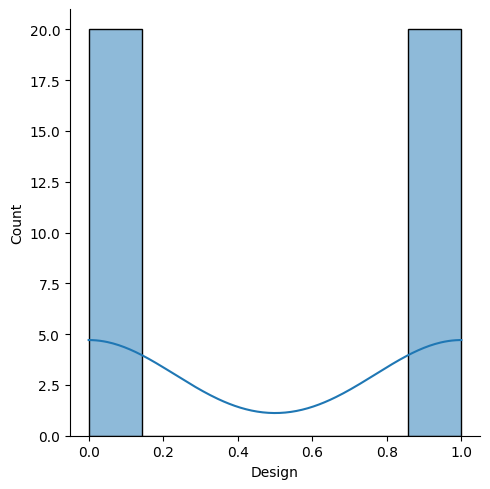

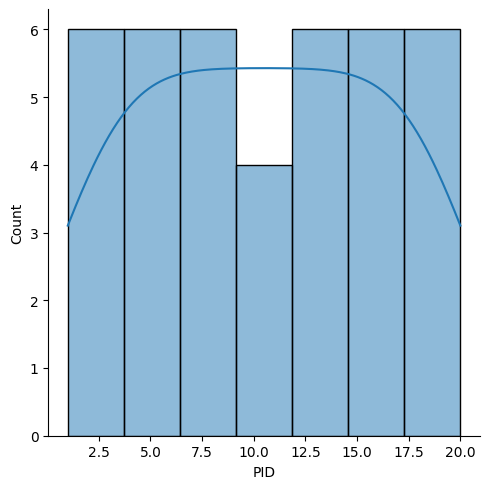

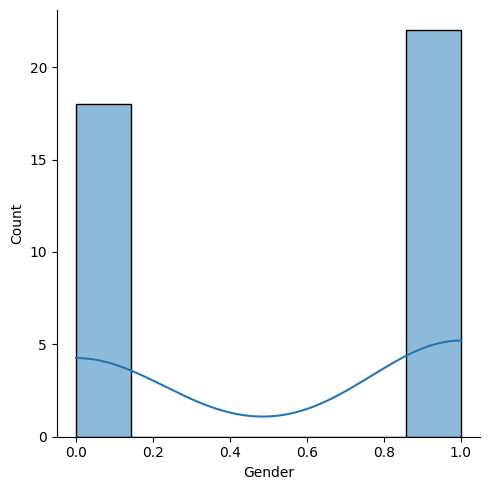

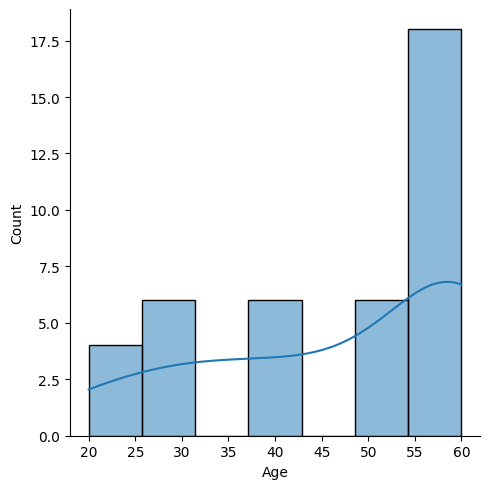

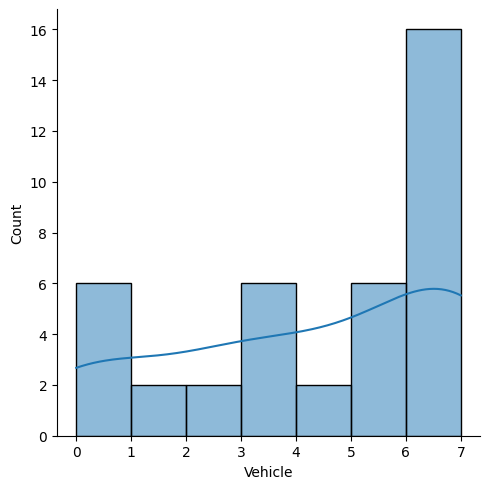

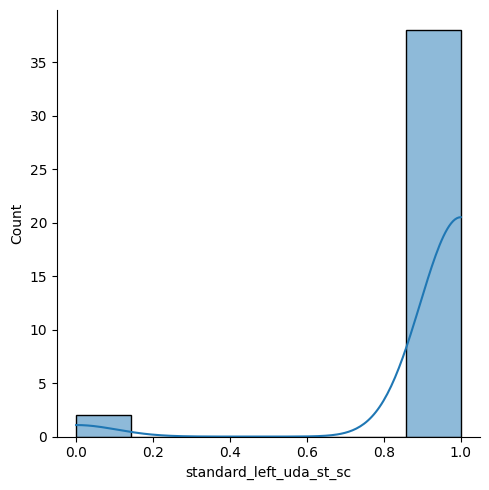

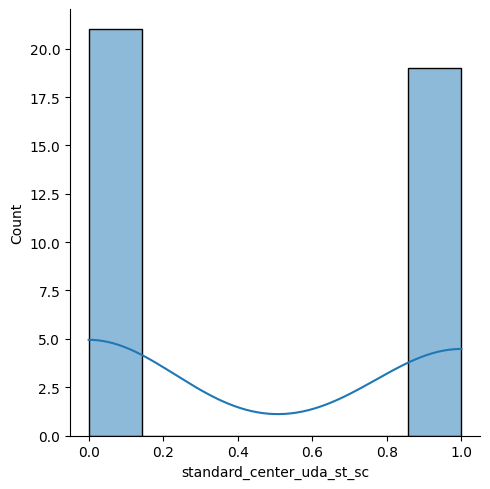

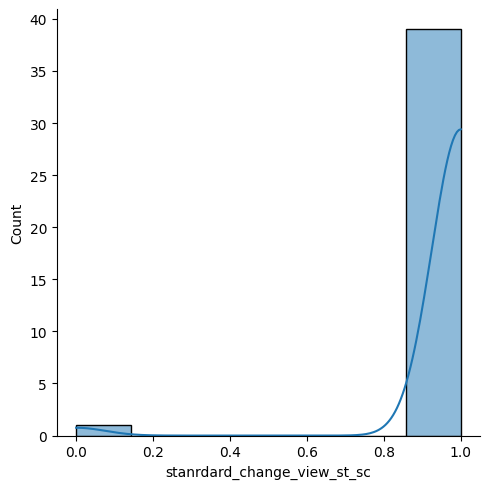

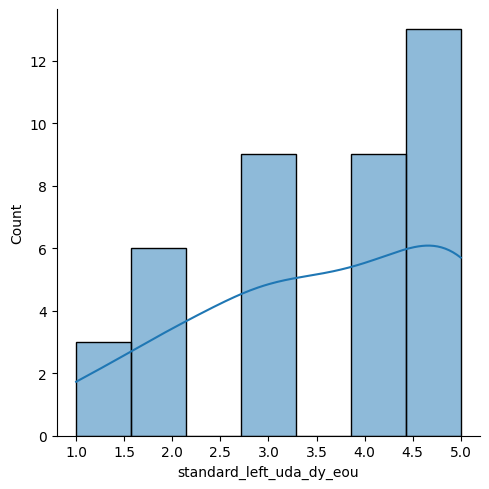

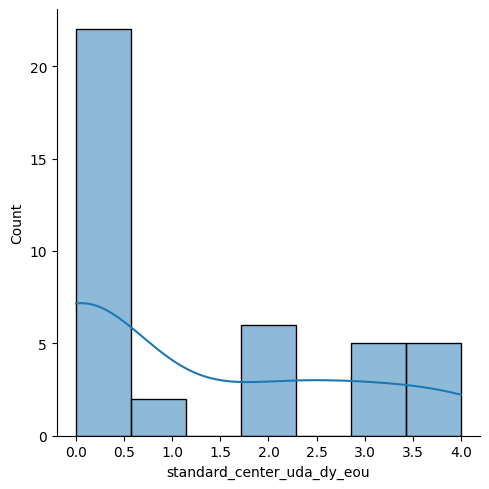

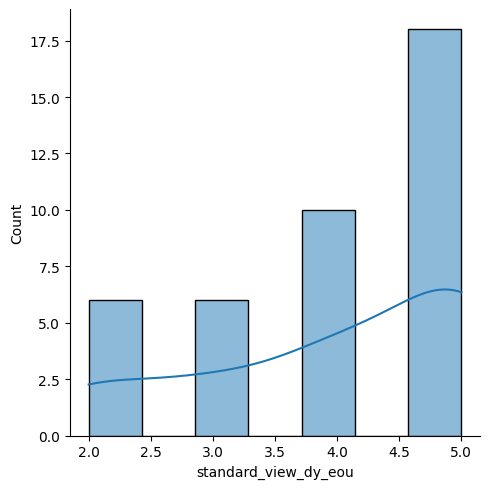

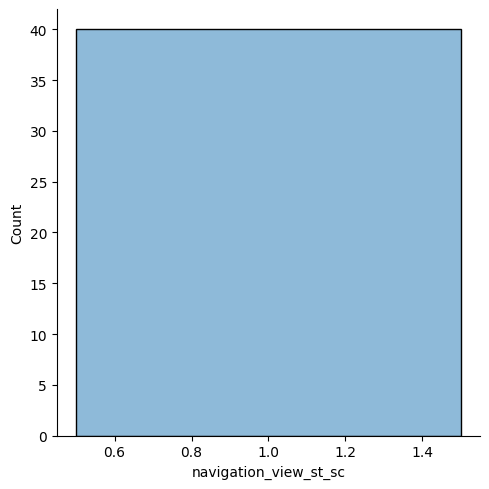

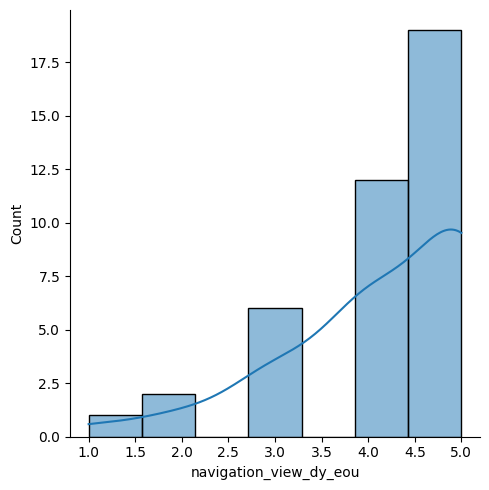

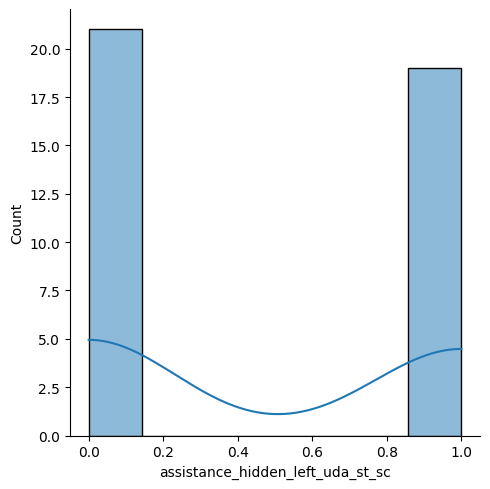

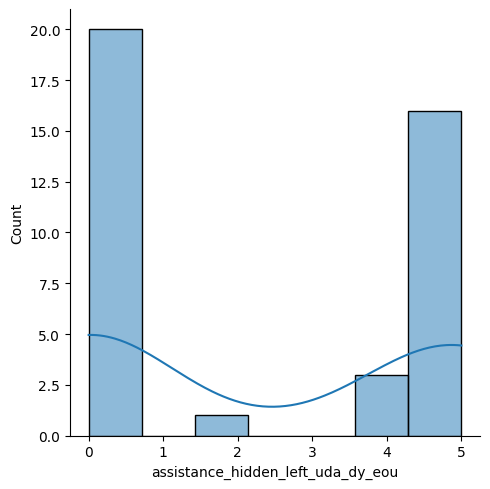

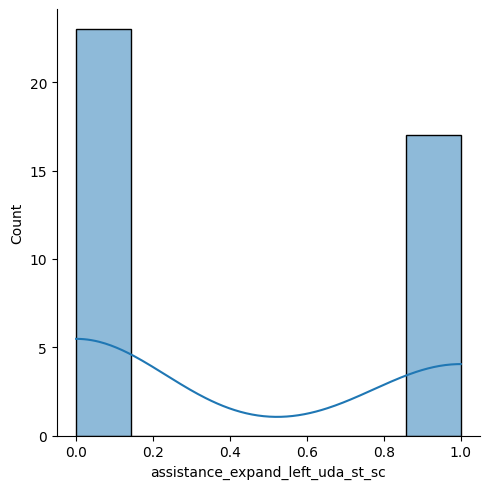

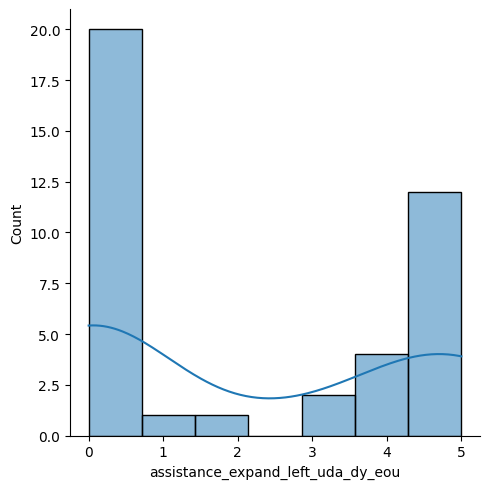

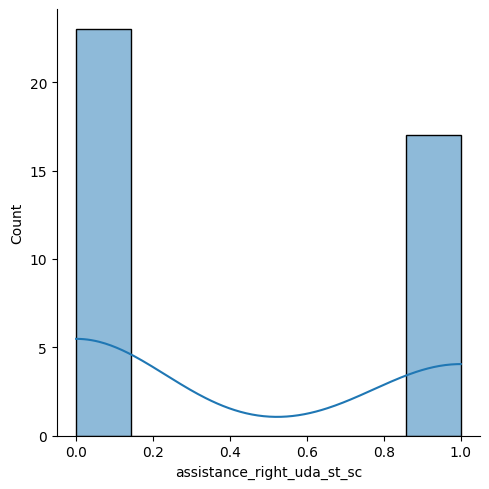

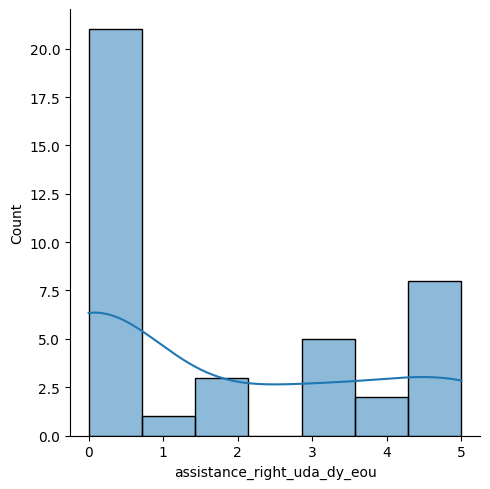

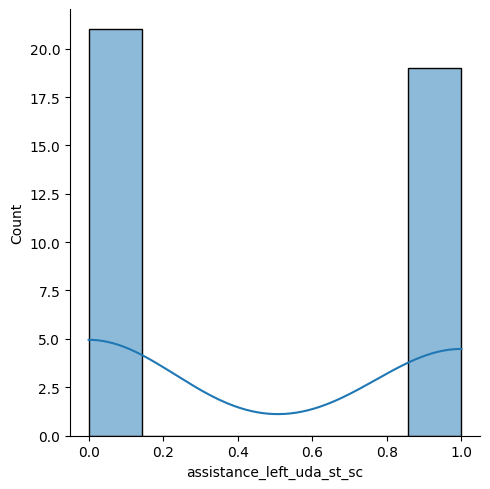

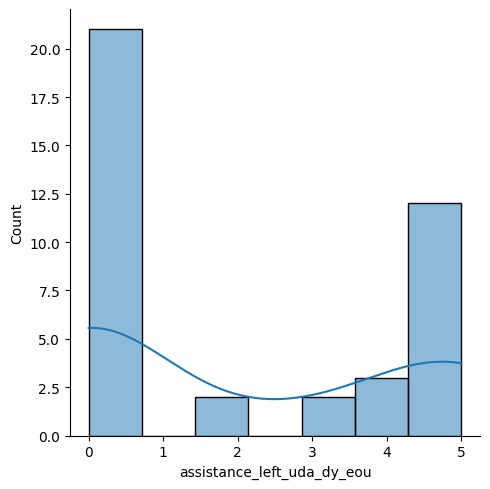

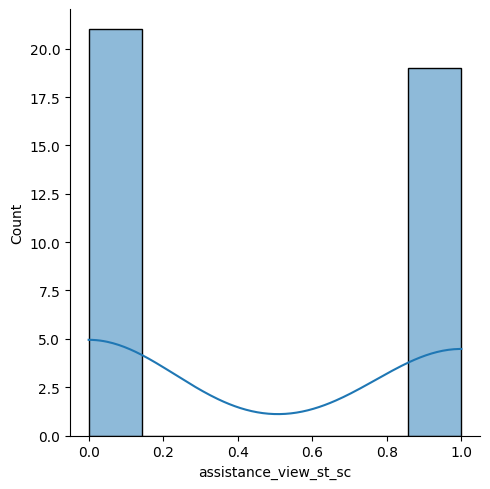

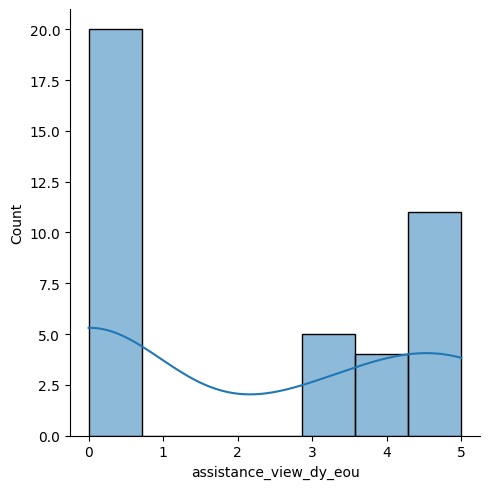

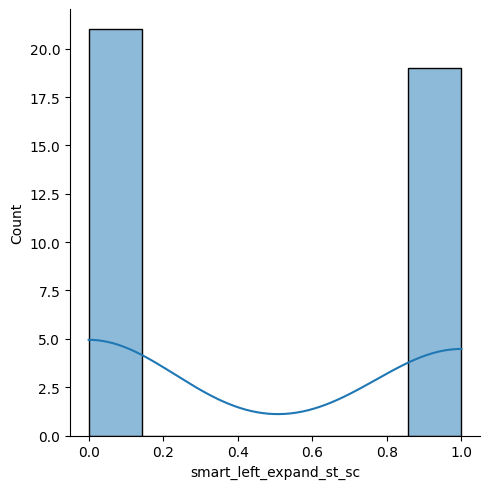

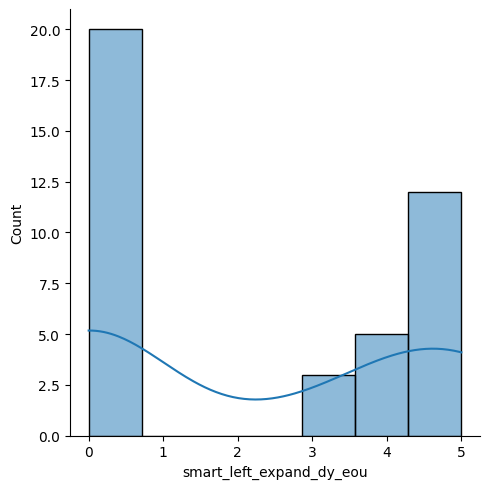

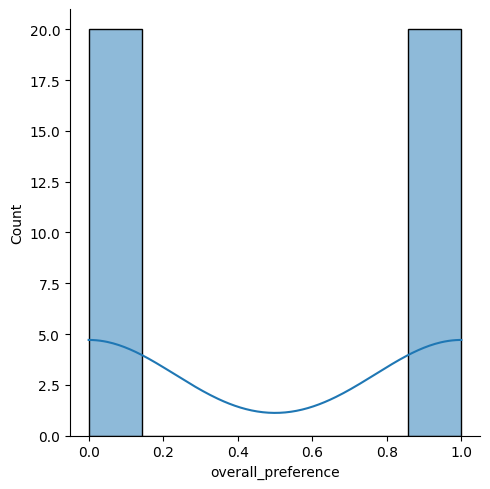

In [ ]:
col_attrition_num = train_num.columns.values
for i in range(0,len(col_attrition_num)):
    sns.displot(train_num[col_attrition_num[i]],kde=True) # kde : kernel density

#### Refining Features by Correlation

In [511]:
train_num.nunique().sort_values()

navigation_view_st_sc                 1
Design                                2
smart_left_expand_st_sc               2
assistance_view_st_sc                 2
assistance_left_uda_st_sc             2
assistance_right_uda_st_sc            2
assistance_expand_left_uda_st_sc      2
assistance_hidden_left_uda_st_sc      2
overall_preference                    2
stanrdard_change_view_st_sc           2
standard_center_uda_st_sc             2
standard_left_uda_st_sc               2
Gender                                2
standard_view_dy_eou                  4
smart_left_expand_dy_eou              4
assistance_hidden_left_uda_dy_eou     4
assistance_view_dy_eou                4
standard_center_uda_dy_eou            5
assistance_left_uda_dy_eou            5
navigation_view_dy_eou                5
standard_left_uda_dy_eou              5
Age                                   5
assistance_right_uda_dy_eou           6
assistance_expand_left_uda_dy_eou     6
Vehicle                               8


In [514]:
train_num.corr()

,Design,PID,Gender,Age,Vehicle,standard_left_uda_st_sc,standard_center_uda_st_sc,stanrdard_change_view_st_sc,standard_left_uda_dy_eou,standard_center_uda_dy_eou,standard_view_dy_eou,navigation_view_st_sc,navigation_view_dy_eou,assistance_hidden_left_uda_st_sc,assistance_hidden_left_uda_dy_eou,assistance_expand_left_uda_st_sc,assistance_expand_left_uda_dy_eou,assistance_right_uda_st_sc,assistance_right_uda_dy_eou,assistance_left_uda_st_sc,assistance_left_uda_dy_eou,assistance_view_st_sc,assistance_view_dy_eou,smart_left_expand_st_sc,smart_left_expand_dy_eou,overall_preference
Design,1.000000e+00,7.701484e-18,1.115816e-17,3.038393e-16,2.590960e-17,-0.229416,9.511897e-01,0.160128,-0.058487,0.812279,4.564355e-02,NaN,0.197305,-0.951190,-0.977683,-0.859727,-0.935536,0.859727,8.551861e-01,0.951190,0.903557,9.511897e-01,0.963680,9.511897e-01,0.973448,5.551115e-17
PID,7.701484e-18,1.000000e+00,2.614435e-02,-6.116122e-03,4.620554e-01,-0.099464,-2.170490e-02,0.124964,-0.160597,-0.104932,1.306073e-01,NaN,0.008554,-0.004341,0.041486,0.074548,-0.048673,-0.065777,-6.144192e-02,0.021705,-0.076437,8.247861e-02,-0.046639,-2.170490e-02,-0.080615,-3.850742e-17
Gender,1.115816e-17,2.614435e-02,1.000000e+00,3.757165e-01,2.736401e-02,0.253629,-4.528334e-02,-0.144841,-0.025472,-0.131619,4.587349e-02,NaN,0.233002,0.055346,-0.014635,-0.137233,0.005531,0.066075,-3.683547e-02,-0.045283,-0.024364,-4.528334e-02,0.105863,-4.528334e-02,0.001099,-2.231632e-17
Age,3.038393e-16,-6.116122e-03,3.757165e-01,1.000000e+00,-1.261999e-01,0.032363,-4.590488e-02,-0.146829,-0.180141,-0.132126,-8.048619e-02,NaN,0.083501,0.024718,-0.013205,-0.103445,-0.034935,-0.032104,2.449147e-16,-0.045905,-0.096375,-1.059343e-02,0.030034,-4.590488e-02,-0.040888,-2.819127e-17
Vehicle,2.590960e-17,4.620554e-01,2.736401e-02,-1.261999e-01,1.000000e+00,0.071386,-3.310257e-02,0.143250,-0.150901,-0.152812,2.041627e-01,NaN,0.107440,-0.052575,-0.021036,0.057044,0.040669,-0.001967,-1.187960e-01,0.064258,-0.002572,2.531373e-02,0.035739,-3.310257e-02,-0.028503,1.295480e-17
standard_left_uda_st_sc,-2.294157e-01,-9.946434e-02,2.536286e-01,3.236348e-02,7.138590e-02,1.000000,-2.411882e-01,-0.036736,0.102870,-0.193956,-1.047135e-01,NaN,-0.192376,0.218218,0.224296,0.197235,0.214627,0.197235,-3.083035e-01,-0.241188,-0.298296,-2.411882e-01,-0.190235,-2.411882e-01,-0.228343,-2.294157e-01
standard_center_uda_st_sc,9.511897e-01,-2.170490e-02,-4.528334e-02,-4.590488e-02,-3.310257e-02,-0.241188,1.000000e+00,0.152312,0.041968,0.853961,7.103317e-17,NaN,0.155573,-0.904762,-0.929962,-0.817763,-0.889872,0.903844,8.990700e-01,0.899749,0.949923,8.997494e-01,0.900935,1.000000e+00,0.957693,5.006262e-02
stanrdard_change_view_st_sc,1.601282e-01,1.249638e-01,-1.448414e-01,-1.468294e-01,1.432501e-01,-0.036736,1.523123e-01,1.000000,-0.053071,0.130069,2.923527e-01,NaN,0.181666,-0.168345,-0.109921,-0.186255,-0.061685,0.137666,1.369394e-01,0.152312,0.144685,1.523123e-01,0.154312,1.523123e-01,0.155876,1.601282e-01
standard_left_uda_dy_eou,-5.848720e-02,-1.605970e-01,-2.547213e-02,-1.801411e-01,-1.509009e-01,0.102870,4.196832e-02,-0.053071,1.000000,0.217502,3.915359e-01,NaN,0.491405,0.002928,0.015816,0.245499,0.138401,0.087749,1.786337e-01,-0.036112,0.110419,2.928022e-03,0.022283,4.196832e-02,0.066743,1.364701e-01
standard_center_uda_dy_eou,8.122787e-01,-1.049315e-01,-1.316190e-01,-1.321263e-01,-1.528117e-01,-0.193956,8.539607e-01,0.130069,0.217502,1.000000,-1.513277e-02,NaN,0.239583,-0.772631,-0.794151,-0.698338,-0.759916,0.777142,8.121120e-01,0.721178,0.807736,8.207650e-01,0.762715,8.539607e-01,0.855622,1.160398e-01


In [ ]:
num_feat = train_num.columns.values
comb_num_feat = np.array(list(combinations(num_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(train_num[comb[0]], train_num[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)

In [ ]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.95]
high_corr_num

array([['Design', 'standard_center_uda_st_sc'],
       ['Design', 'assistance_hidden_left_uda_st_sc'],
       ['Design', 'assistance_hidden_left_uda_dy_eou'],
       ['Design', 'assistance_left_uda_st_sc'],
       ['Design', 'assistance_view_st_sc'],
       ['Design', 'assistance_view_dy_eou'],
       ['Design', 'smart_left_expand_st_sc'],
       ['Design', 'smart_left_expand_dy_eou'],
       ['standard_center_uda_st_sc', 'smart_left_expand_st_sc'],
       ['standard_center_uda_st_sc', 'smart_left_expand_dy_eou'],
       ['assistance_hidden_left_uda_dy_eou', 'smart_left_expand_dy_eou'],
       ['assistance_view_dy_eou', 'smart_left_expand_dy_eou'],
       ['smart_left_expand_st_sc', 'smart_left_expand_dy_eou']],
      dtype='<U33')

#### Categorical Features

In [ ]:
train_cat_dummies.nunique().sort_values()

Design_IC_Content_E    2
Design_IC_Content_O    2
Gender_Female          2
Gender_Male            2
Vehicle_BMW            2
Vehicle_Chevrolet      2
Vehicle_Dodge          2
Vehicle_Ford           2
Vehicle_GMC            2
Vehicle_Lexus          2
Vehicle_Lincoln        2
Vehicle_Toyota         2
dtype: int64

In [ ]:
train_cat_dummies.head()

,Design_IC_Content_E,Design_IC_Content_O,Gender_Female,Gender_Male,Vehicle_BMW,Vehicle_Chevrolet,Vehicle_Dodge,Vehicle_Ford,Vehicle_GMC,Vehicle_Lexus,Vehicle_Lincoln,Vehicle_Toyota
0,False,True,False,True,False,False,False,True,False,False,False,False
1,False,True,False,True,False,False,False,True,False,False,False,False
2,False,True,True,False,True,False,False,False,False,False,False,False
3,False,True,False,True,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,True,False,False,False,False


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [515]:
rows= []

for var1 in train_num:
  col = []
  for var2 in train_num :
    cramers =cramers_V(train_num[var1], train_num[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = train_num.columns, index =train_num.columns)

df

,Design,PID,Gender,Age,Vehicle,standard_left_uda_st_sc,standard_center_uda_st_sc,stanrdard_change_view_st_sc,standard_left_uda_dy_eou,standard_center_uda_dy_eou,standard_view_dy_eou,navigation_view_st_sc,navigation_view_dy_eou,assistance_hidden_left_uda_st_sc,assistance_hidden_left_uda_dy_eou,assistance_expand_left_uda_st_sc,assistance_expand_left_uda_dy_eou,assistance_right_uda_st_sc,assistance_right_uda_dy_eou,assistance_left_uda_st_sc,assistance_left_uda_dy_eou,assistance_view_st_sc,assistance_view_dy_eou,smart_left_expand_st_sc,smart_left_expand_dy_eou,overall_preference
Design,0.90,0.00,0.00,0.00,0.00,0.01,0.81,0.00,0.05,0.82,0.02,NaN,0.19,0.81,1.00,0.65,1.00,0.65,0.90,0.81,0.90,0.81,1.00,0.81,1.00,0.00
PID,0.00,1.00,1.00,1.00,1.00,0.47,0.05,0.49,0.57,0.40,0.51,NaN,0.62,0.05,0.33,0.13,0.40,0.13,0.41,0.05,0.39,0.05,0.33,0.05,0.33,0.00
Gender,0.00,1.00,0.90,0.36,0.58,0.02,0.00,0.00,0.07,0.09,0.05,NaN,0.11,0.00,0.03,0.01,0.05,0.00,0.04,0.00,0.02,0.00,0.20,0.00,0.02,0.00
Age,0.00,1.00,0.36,1.00,0.27,0.06,0.00,0.03,0.08,0.05,0.13,NaN,0.17,0.01,0.07,0.02,0.07,0.02,0.10,0.00,0.06,0.01,0.15,0.00,0.14,0.00
Vehicle,0.00,1.00,0.58,0.27,1.00,0.07,0.05,0.49,0.28,0.16,0.17,NaN,0.17,0.00,0.12,0.10,0.21,0.05,0.10,0.05,0.15,0.01,0.16,0.05,0.15,0.00
standard_left_uda_st_sc,0.01,0.47,0.02,0.06,0.07,0.54,0.02,0.00,0.09,0.14,0.03,NaN,0.06,0.01,0.05,0.01,0.05,0.01,0.28,0.02,0.12,0.02,0.10,0.02,0.10,0.01
standard_center_uda_st_sc,0.81,0.05,0.00,0.00,0.05,0.02,0.90,0.00,0.05,0.90,0.01,NaN,0.16,0.73,0.90,0.59,0.90,0.73,1.00,0.72,1.00,0.72,0.91,0.90,0.93,0.00
stanrdard_change_view_st_sc,0.00,0.49,0.00,0.03,0.49,0.00,0.00,0.24,0.09,0.02,0.15,NaN,0.15,0.00,0.32,0.00,0.49,0.00,0.02,0.00,0.02,0.00,0.03,0.00,0.03,0.00
standard_left_uda_dy_eou,0.05,0.57,0.07,0.08,0.28,0.09,0.05,0.09,1.00,0.08,0.24,NaN,0.22,0.07,0.04,0.13,0.18,0.04,0.16,0.10,0.08,0.04,0.12,0.05,0.20,0.11
standard_center_uda_dy_eou,0.82,0.40,0.09,0.05,0.16,0.14,0.90,0.02,0.08,1.00,0.06,NaN,0.15,0.74,0.27,0.60,0.20,0.74,0.44,0.74,0.37,0.77,0.37,0.90,0.35,0.15


<Axes: >

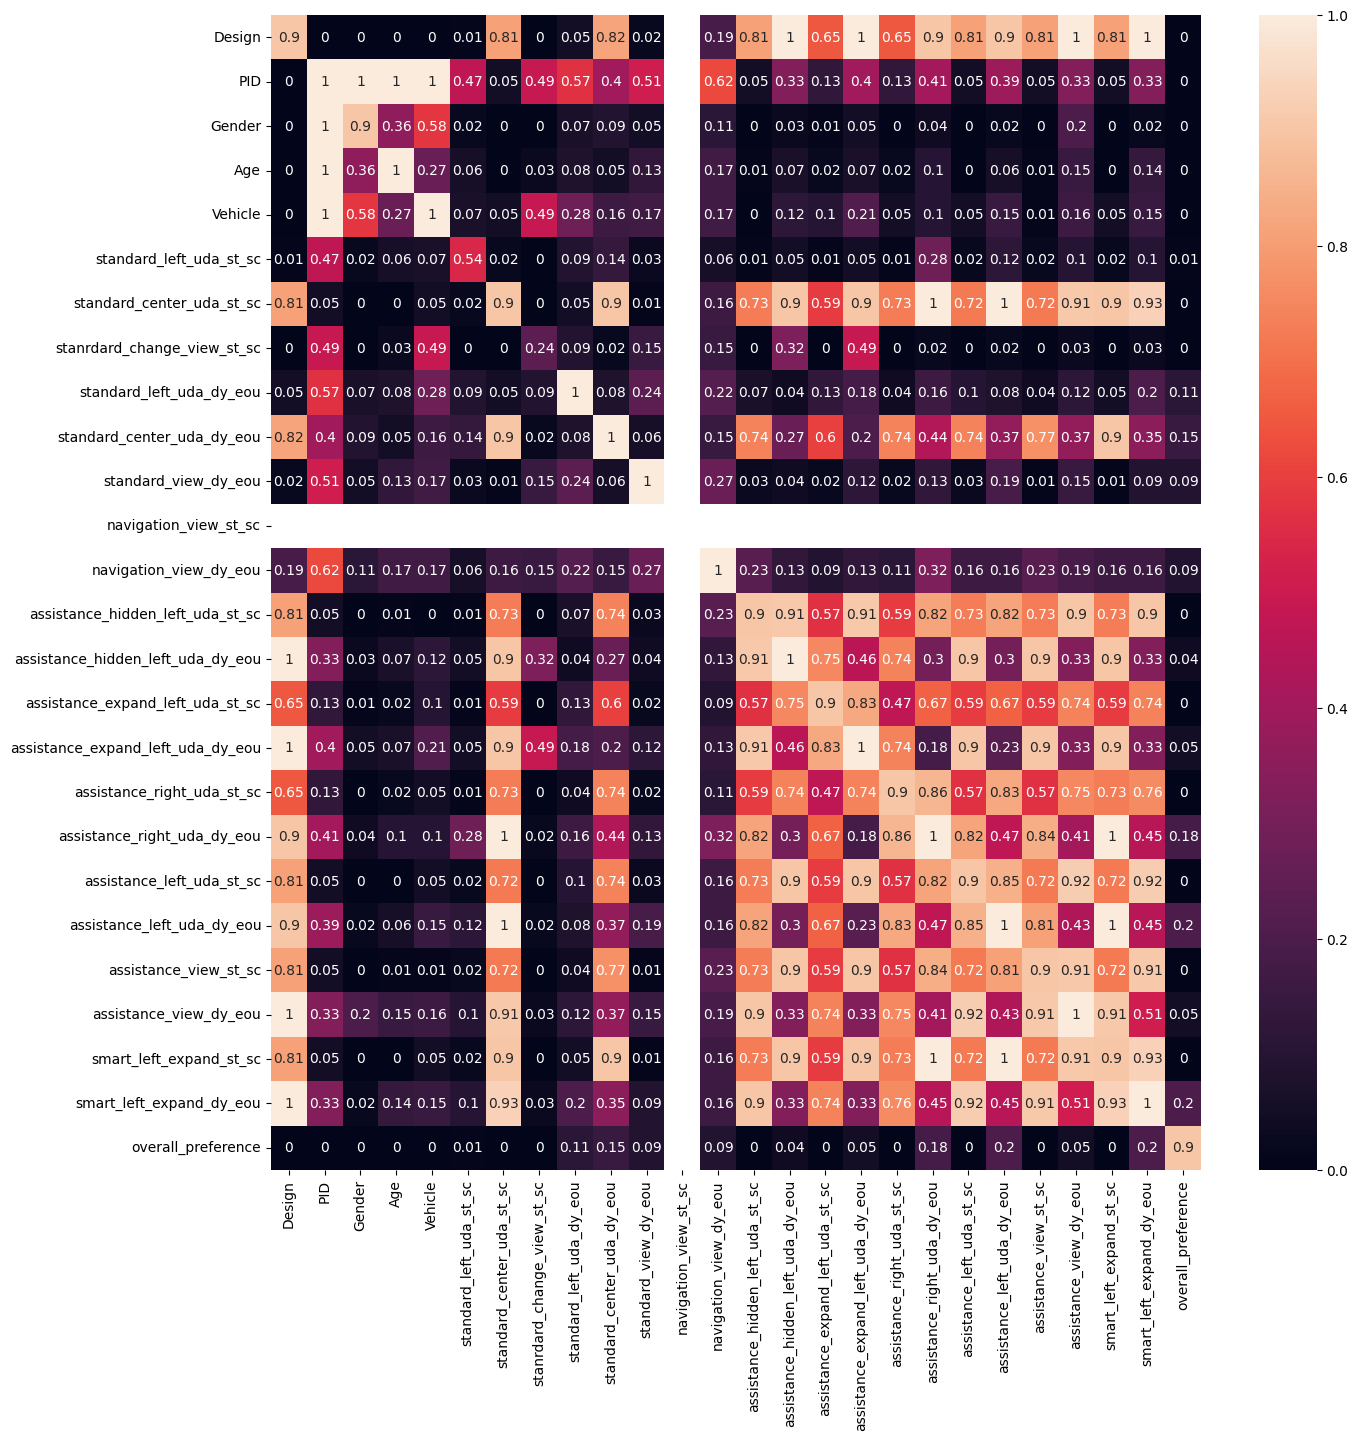

In [521]:
plt.figure(figsize=(15,15))

sns.heatmap(df, annot=True)

In [ ]:
#Correlation
np.sum(df > 0.95)

Design_IC_Content_E    0
Design_IC_Content_O    0
Gender_Female          0
Gender_Male            0
Vehicle_BMW            0
Vehicle_Chevrolet      0
Vehicle_Dodge          0
Vehicle_Ford           0
Vehicle_GMC            0
Vehicle_Lexus          0
Vehicle_Lincoln        0
Vehicle_Toyota         0
dtype: int64

#### Data Cluster

In [ ]:
o_standard = pd.merge(contentfeature[['Design', 'bg_color', 'bg_r', 'bg_g', 'bg_b', 'bg_image', 'bg_image_type', 'mode_number', 'circledesign_color1', 'circledesign_color1_r','circledesign_color1_g', 'circledesign_color1_b', 'circledesign_color2', 'circledesign_color2_r', 'circledesign_color2_g', 'circledesign_color2_b', 'circledesign_gradation', 'speed_info', 'gas_info', 'gas_location_x', 'gas_location_y', 'gas_size_l', 'gas_size_w', 'range_size_l', 'range_size_w', 'range_location_x', 'range_location_y', 'range_color', 'range_r', 'range_g', 'range_b', 'speed_size_l', 'speed_size_w',  'speed_location_x', 'speed_location_y', 'speed_color', 'speed_r', 'speed_g', 'speed_b', 'fbar_location1_x', 'fbar_location1_y', 'fbar_size_l', 'fbar_size_w', 'fbar_icon_default_num', 'fbar_icon_size_l', 'fbar_icon_size_w',   'left_content_location_x', 'left_content_location_y',  'left_content_size_l', 'left_content_size_w','center_content_location_x', 'center_content_location_y', "center_content_size_l", "center_content_size_w", 'right_content_size_l', 'right_content_size_w', 'right_content_location_x', 'right_content_location_y', 'arrow', 'arrow_size_l', 'arrow_size_w', 'dot', 'dot_size_l', 'dot_size_w', 'left_uda_menu_depth', 'center_uda_menu_depth', 'sa_acc_on_color', 'sa_acc_on_r', 'sa_acc_on_g', 'sa_acc_on_b', 'sa_vehicle_size_l', 'sa_vehicle_size_w', 'sa_size_l', 'sa_size_w',  'sa_location_x', 'sa_location_y' , 'IC_size_l', 'IC_size_w' ]], contentut[['Design', "Age", 'Gender', 'PID', 'standard_left_uda_st_sc', 'standard_center_uda_st_sc', 'stanrdard_change_view_st_sc', 'standard_left_uda_dy_eou', 'standard_center_uda_dy_eou', 'standard_view_dy_eou']], how ='inner', on ='Design') 
o_standard = o_standard.drop_duplicates(keep=False)
print(o_standard.columns)
print(o_standard.shape)
print(o_standard["Design"].duplicated().value_counts()) 

ValueError: You are trying to merge on object and int32 columns. If you wish to proceed you should use pd.concat

In [ ]:
e_standard = pd.merge(contentfeature[['Design', 'bg_color', 'bg_r', 'bg_g', 'bg_b', 'bg_image', 'bg_image_type', 'mode_number', 'circledesign_color1', 'circledesign_color1_r','circledesign_color1_g', 'circledesign_color1_b', 'circledesign_color2', 'circledesign_color2_r', 'circledesign_color2_g', 'circledesign_color2_b', 'circledesign_gradation', 'speed_info', 'gas_info', 'gas_location_x', 'gas_location_y', 'gas_size_l', 'gas_size_w', 'range_size_l', 'range_size_w', 'range_location_x', 'range_location_y', 'range_color', 'range_r', 'range_g', 'range_b', 'speed_size_l', 'speed_size_w',  'speed_location_x', 'speed_location_y', 'speed_color', 'speed_r', 'speed_g', 'speed_b', 'fbar_location1_x', 'fbar_location1_y', 'fbar_size_l', 'fbar_size_w', 'fbar_icon_default_num', 'fbar_icon_size_l', 'fbar_icon_size_w',   'left_content_location_x', 'left_content_location_y',  'left_content_size_l', 'left_content_size_w','center_content_location_x', 'center_content_location_y', "center_content_size_l", "center_content_size_w", 'right_content_size_l', 'right_content_size_w', 'right_content_location_x', 'right_content_location_y', 'arrow', 'arrow_size_l', 'arrow_size_w', 'dot', 'dot_size_l', 'dot_size_w', 'left_uda_menu_depth', 'center_uda_menu_depth', 'sa_acc_on_color', 'sa_acc_on_r', 'sa_acc_on_g', 'sa_acc_on_b', 'sa_vehicle_size_l', 'sa_vehicle_size_w', 'sa_size_l', 'sa_size_w',  'sa_location_x', 'sa_location_y' , 'IC_size_l', 'IC_size_w' ]], contentut[['Design', "Age", 'Gender', 'PID', 'standard_left_uda_st_sc', 'stanrdard_change_view_st_sc', 'standard_left_uda_dy_eou', 'standard_view_dy_eou', 'navigation_view_st_sc', 'navigation_view_st_sc', 'assistance_hidden_left_uda_dy_eou', 'assistance_expand_left_uda_st_sc', 'assistance_expand_left_uda_dy_eou']], how ='inner', on ='Design') 
e_standard = e_standard.drop_duplicates(keep=False)
print(e_standard.columns)
print(e_standard.shape)
print(e_standard["Design"].duplicated().value_counts()) 

Index(['Design', 'bg_color', 'bg_r', 'bg_g', 'bg_b', 'bg_image',
       'bg_image_type', 'mode_number', 'circledesign_color1',
       'circledesign_color1_r', 'circledesign_color1_g',
       'circledesign_color1_b', 'circledesign_color2', 'circledesign_color2_r',
       'circledesign_color2_g', 'circledesign_color2_b',
       'circledesign_gradation', 'speed_info', 'gas_info', 'gas_location_x',
       'gas_location_y', 'gas_size_l', 'gas_size_w', 'range_size_l',
       'range_size_w', 'range_location_x', 'range_location_y', 'range_color',
       'range_r', 'range_g', 'range_b', 'speed_size_l', 'speed_size_w',
       'speed_location_x', 'speed_location_y', 'speed_color', 'speed_r',
       'speed_g', 'speed_b', 'fbar_location1_x', 'fbar_location1_y',
       'fbar_size_l', 'fbar_size_w', 'fbar_icon_default_num',
       'fbar_icon_size_l', 'fbar_icon_size_w', 'left_content_location_x',
       'left_content_location_y', 'left_content_size_l', 'left_content_size_w',
       'center_content_lo

#### Accuracy Score

In [ ]:
# Concat the two dataframes together columnwise
train_final = pd.concat([contentut["overall_preference"], train_num, train_cat_dummies], axis=1)

In [ ]:
train_final.head()

,overall_preference,Design,PID,Gender,Age,Vehicle,standard_left_uda_st_sc,standard_center_uda_st_sc,stanrdard_change_view_st_sc,standard_left_uda_dy_eou,...,Gender_Female,Gender_Male,Vehicle_BMW,Vehicle_Chevrolet,Vehicle_Dodge,Vehicle_Ford,Vehicle_GMC,Vehicle_Lexus,Vehicle_Lincoln,Vehicle_Toyota
0,1.0,1,1,1,50,3,1,1.0,1,2,...,False,True,False,False,False,True,False,False,False,False
1,1.0,1,2,1,50,3,1,1.0,1,5,...,False,True,False,False,False,True,False,False,False,False
2,1.0,1,3,0,60,0,1,1.0,1,4,...,True,False,True,False,False,False,False,False,False,False
3,1.0,1,4,1,50,5,1,1.0,1,5,...,False,True,False,False,False,False,False,True,False,False
4,0.0,1,5,0,20,3,1,1.0,1,5,...,True,False,False,False,False,True,False,False,False,False


In [ ]:
target = contentut["overall_preference"]

In [ ]:
X=pd.concat([train_num, train_cat_dummies], axis=1)
Y=contentut["standard_left_uda_st_sc"]

In [524]:
X

,Design,PID,Gender,Age,Vehicle,standard_left_uda_st_sc,standard_center_uda_st_sc,stanrdard_change_view_st_sc,standard_left_uda_dy_eou,standard_center_uda_dy_eou,standard_view_dy_eou,navigation_view_st_sc,navigation_view_dy_eou,assistance_hidden_left_uda_st_sc,assistance_hidden_left_uda_dy_eou,assistance_expand_left_uda_st_sc,assistance_expand_left_uda_dy_eou,assistance_right_uda_st_sc,assistance_right_uda_dy_eou,assistance_left_uda_st_sc,assistance_left_uda_dy_eou,assistance_view_st_sc,assistance_view_dy_eou,smart_left_expand_st_sc,smart_left_expand_dy_eou,overall_preference,Design_IC_Content_E,Design_IC_Content_O,Gender_Female,Gender_Male,Vehicle_BMW,Vehicle_Chevrolet,Vehicle_Dodge,Vehicle_Ford,Vehicle_GMC,Vehicle_Lexus,Vehicle_Lincoln,Vehicle_Toyota
0,1,1,1,50,3,1,1.0,1,2,1.0,5,1,4,0.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,0.0,5.0,1.0,5.0,1.0,False,True,False,True,False,False,False,True,False,False,False,False
1,1,2,1,50,3,1,1.0,1,5,2.0,5,1,5,0.0,0.0,0.0,0.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,False,True,False,True,False,False,False,True,False,False,False,False
2,1,3,0,60,0,1,1.0,1,4,4.0,4,1,5,0.0,0.0,0.0,0.0,1.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,1.0,False,True,True,False,True,False,False,False,False,False,False,False
3,1,4,1,50,5,1,1.0,1,5,3.0,2,1,5,0.0,0.0,0.0,0.0,1.0,4.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,False,True,False,True,False,False,False,False,False,True,False,False
4,1,5,0,20,3,1,1.0,1,5,4.0,5,1,5,0.0,0.0,0.0,0.0,1.0,3.0,1.0,4.0,1.0,5.0,1.0,5.0,0.0,False,True,True,False,False,False,False,True,False,False,False,False
5,1,6,1,60,2,1,1.0,1,5,4.0,5,1,5,0.0,0.0,0.0,0.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,False,True,False,True,False,False,True,False,False,False,False,False
6,1,7,0,40,0,1,1.0,1,4,3.0,3,1,2,0.0,0.0,0.0,0.0,1.0,5.0,1.0,3.0,1.0,3.0,1.0,5.0,1.0,False,True,True,False,True,False,False,False,False,False,False,False
7,1,8,1,60,1,1,1.0,1,3,4.0,2,1,5,0.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0,1.0,4.0,1.0,4.0,0.0,False,True,False,True,False,True,False,False,False,False,False,False
8,1,9,0,30,7,1,1.0,1,1,2.0,2,1,1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,0.0,False,True,True,False,False,False,False,False,False,False,False,True
9,1,10,0,60,7,0,1.0,1,2,2.0,5,1,5,0.0,0.0,0.0,0.0,0.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,False,True,True,False,False,False,False,False,False,False,False,True


In [ ]:
# Divide data by 7:3
X_train,X_test,y_train,y_test=train_test_split(X,Y,
                                               test_size=0.30)

##### Logistic Regression

Logistic regression: to estimante the relationship between a dependent variable and one or more independent variables

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
lr_predictions=model.predict(X_test)

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_test, lr_predictions)))
print("="*60)
print(classification_report(y_test, lr_predictions))

Accuracy score: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.91      0.91      0.91        11

    accuracy                           0.83        12
   macro avg       0.45      0.45      0.45        12
weighted avg       0.83      0.83      0.83        12



##### SelectKBest Apply 

Feature selection for supervised model- a technique where we choose those features in our data that contribute most to the target variable

In [ ]:
# Univariate Selection
X_new = SelectKBest(chi2, k=6).fit_transform(X, Y)

In [ ]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.30)

In [ ]:
model=LogisticRegression()
model.fit(X_new_train,y_new_train)
lr_predictions=model.predict(X_new_test)

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_new_test, lr_predictions)))
print("="*60)
print(classification_report(y_new_test, lr_predictions))

Accuracy score: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      1.00      0.96        11

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12



##### SVM

In [ ]:
sc_x = StandardScaler() 
X_train_sc = sc_x.fit_transform(X_train)  
X_test_sc = sc_x.transform(X_test)

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train_sc,y_train)
clf_predictions=clf.predict(X_test_sc)

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_test, clf_predictions.round(), normalize=True)))
print("="*60)
print(classification_report(y_test, clf_predictions))

Accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        11

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [527]:
X_norm.shape

(40, 38)

In [529]:
X.shape

(40, 38)

In [531]:
pd.DataFrame(X_norm, columns=X.columns) .to_csv("ut_data.csv",encoding='utf-8')

##### Evaluate after applying SelectKBest

In [ ]:
X_norm = MinMaxScaler().fit_transform(X)
X_new = SelectKBest(chi2, k=6).fit_transform(X_norm, Y)


X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.30)

clf = svm.SVC(kernel='linear')
clf.fit(X_new_train,y_new_train)
clf_predictions=clf.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, clf_predictions.round(), normalize=True)))
print("="*60)
print(classification_report(y_new_test, clf_predictions))

Accuracy score: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      1.00      0.96        11

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12



##### Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred.round())))

Accuracy score: 1.0


##### Feature Importance

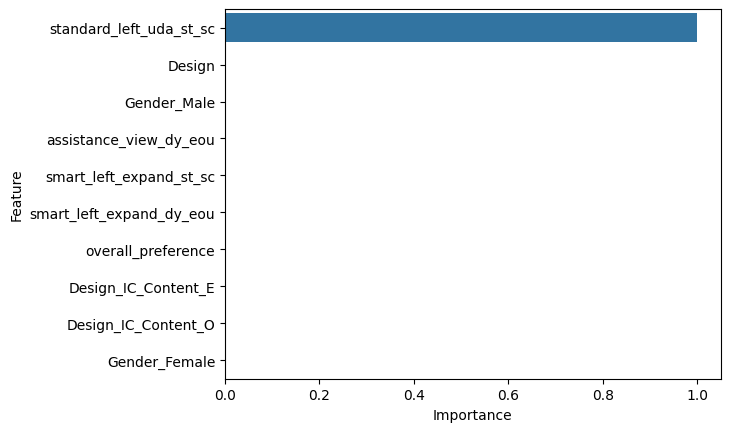

In [ ]:
feat = X.columns.values
imp = rf.feature_importances_
df = pd.DataFrame({'Feature': feat, 'Importance': imp})
df = df.sort_values('Importance', ascending=False)[:10]
sns.barplot(x='Importance', y='Feature', data=df);

##### After applying SelectKBest

In [ ]:
X_new = SelectKBest(chi2, k=6).fit_transform(X, Y)

X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.30)

rf = RandomForestRegressor(n_estimators=20, random_state=0)
rf.fit(X_new_train, y_new_train)
y_pred = rf.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, y_pred.round())))

Accuracy score: 0.75


##### KGBoost

In [ ]:
xgmodel=XGBClassifier()
xgmodel=XGBClassifier(booster='gbtree', importance_type='weight')
xgmodel.fit(X_train,y_train)
y_pred = xgmodel.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred.round())))

Accuracy score: 0.9166666666666666


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,8))

axes = [ax for row_axes in axes for ax in row_axes]

xgboost.plot_importance(xgmodel, importance_type='gain', title='gain')

##### After applying SelectKBest

In [ ]:
X_new = SelectKBest(chi2, k=6).fit_transform(X, Y)

X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,Y,
                                               test_size=0.30)

xgmodel=XGBClassifier()
xgmodel.fit(X_new_train,y_new_train)
y_pred = xgmodel.predict(X_new_test)

print("Accuracy score: {}".format(accuracy_score(y_new_test, y_pred.round())))

Accuracy score: 0.9166666666666666
